In [30]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')

In [31]:
# reading the dataset
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing

In [32]:
# Dropping the columns with irrelevant values
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [33]:
# Verifying the unique values in the diagnosis column
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

##### M = Malignant and B = Benign

In [34]:
# to apply our machine learning, we map M = 1 and B = 0
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [35]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [38]:
# checking for null values

df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

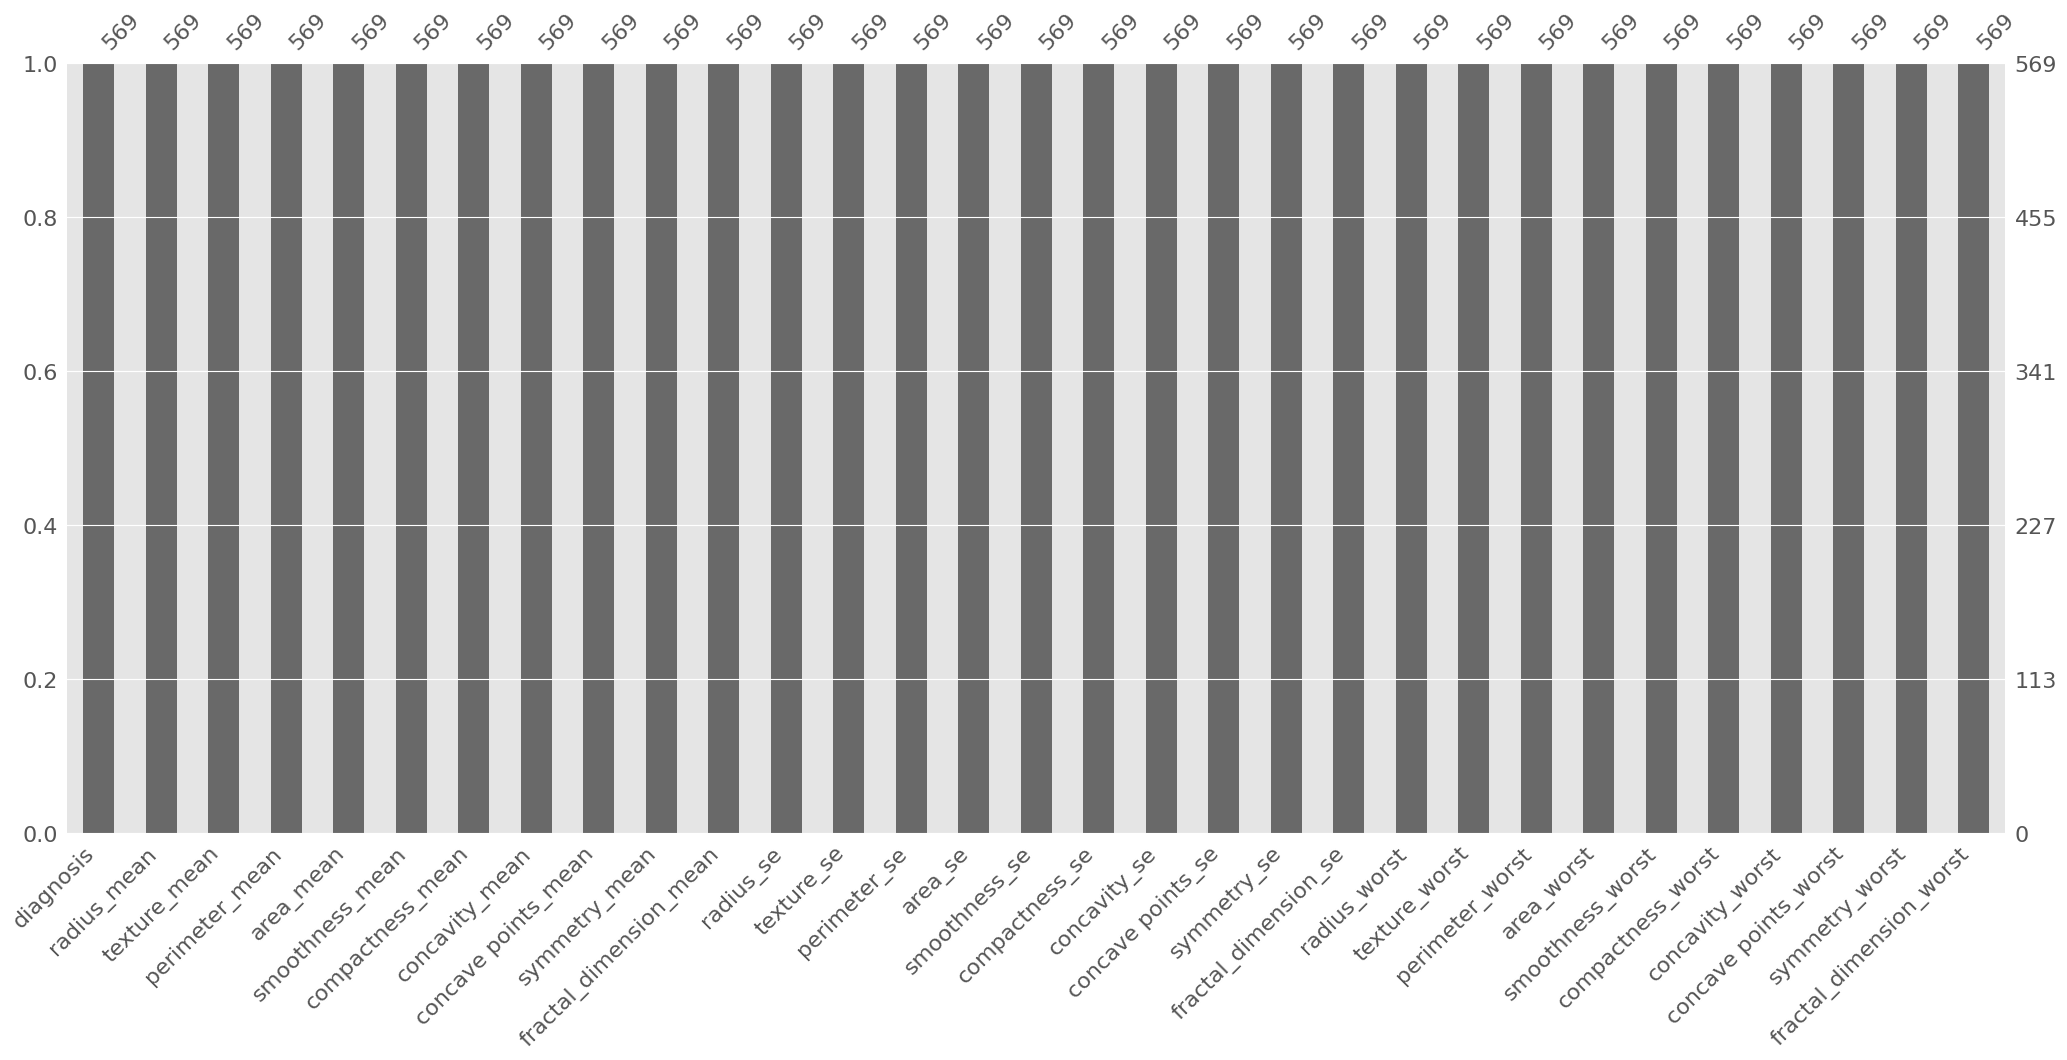

In [39]:
# visualizing null values

msno.bar(df)

##### There are no missing values in the data

## Exploratory Data Analysis (EDA)

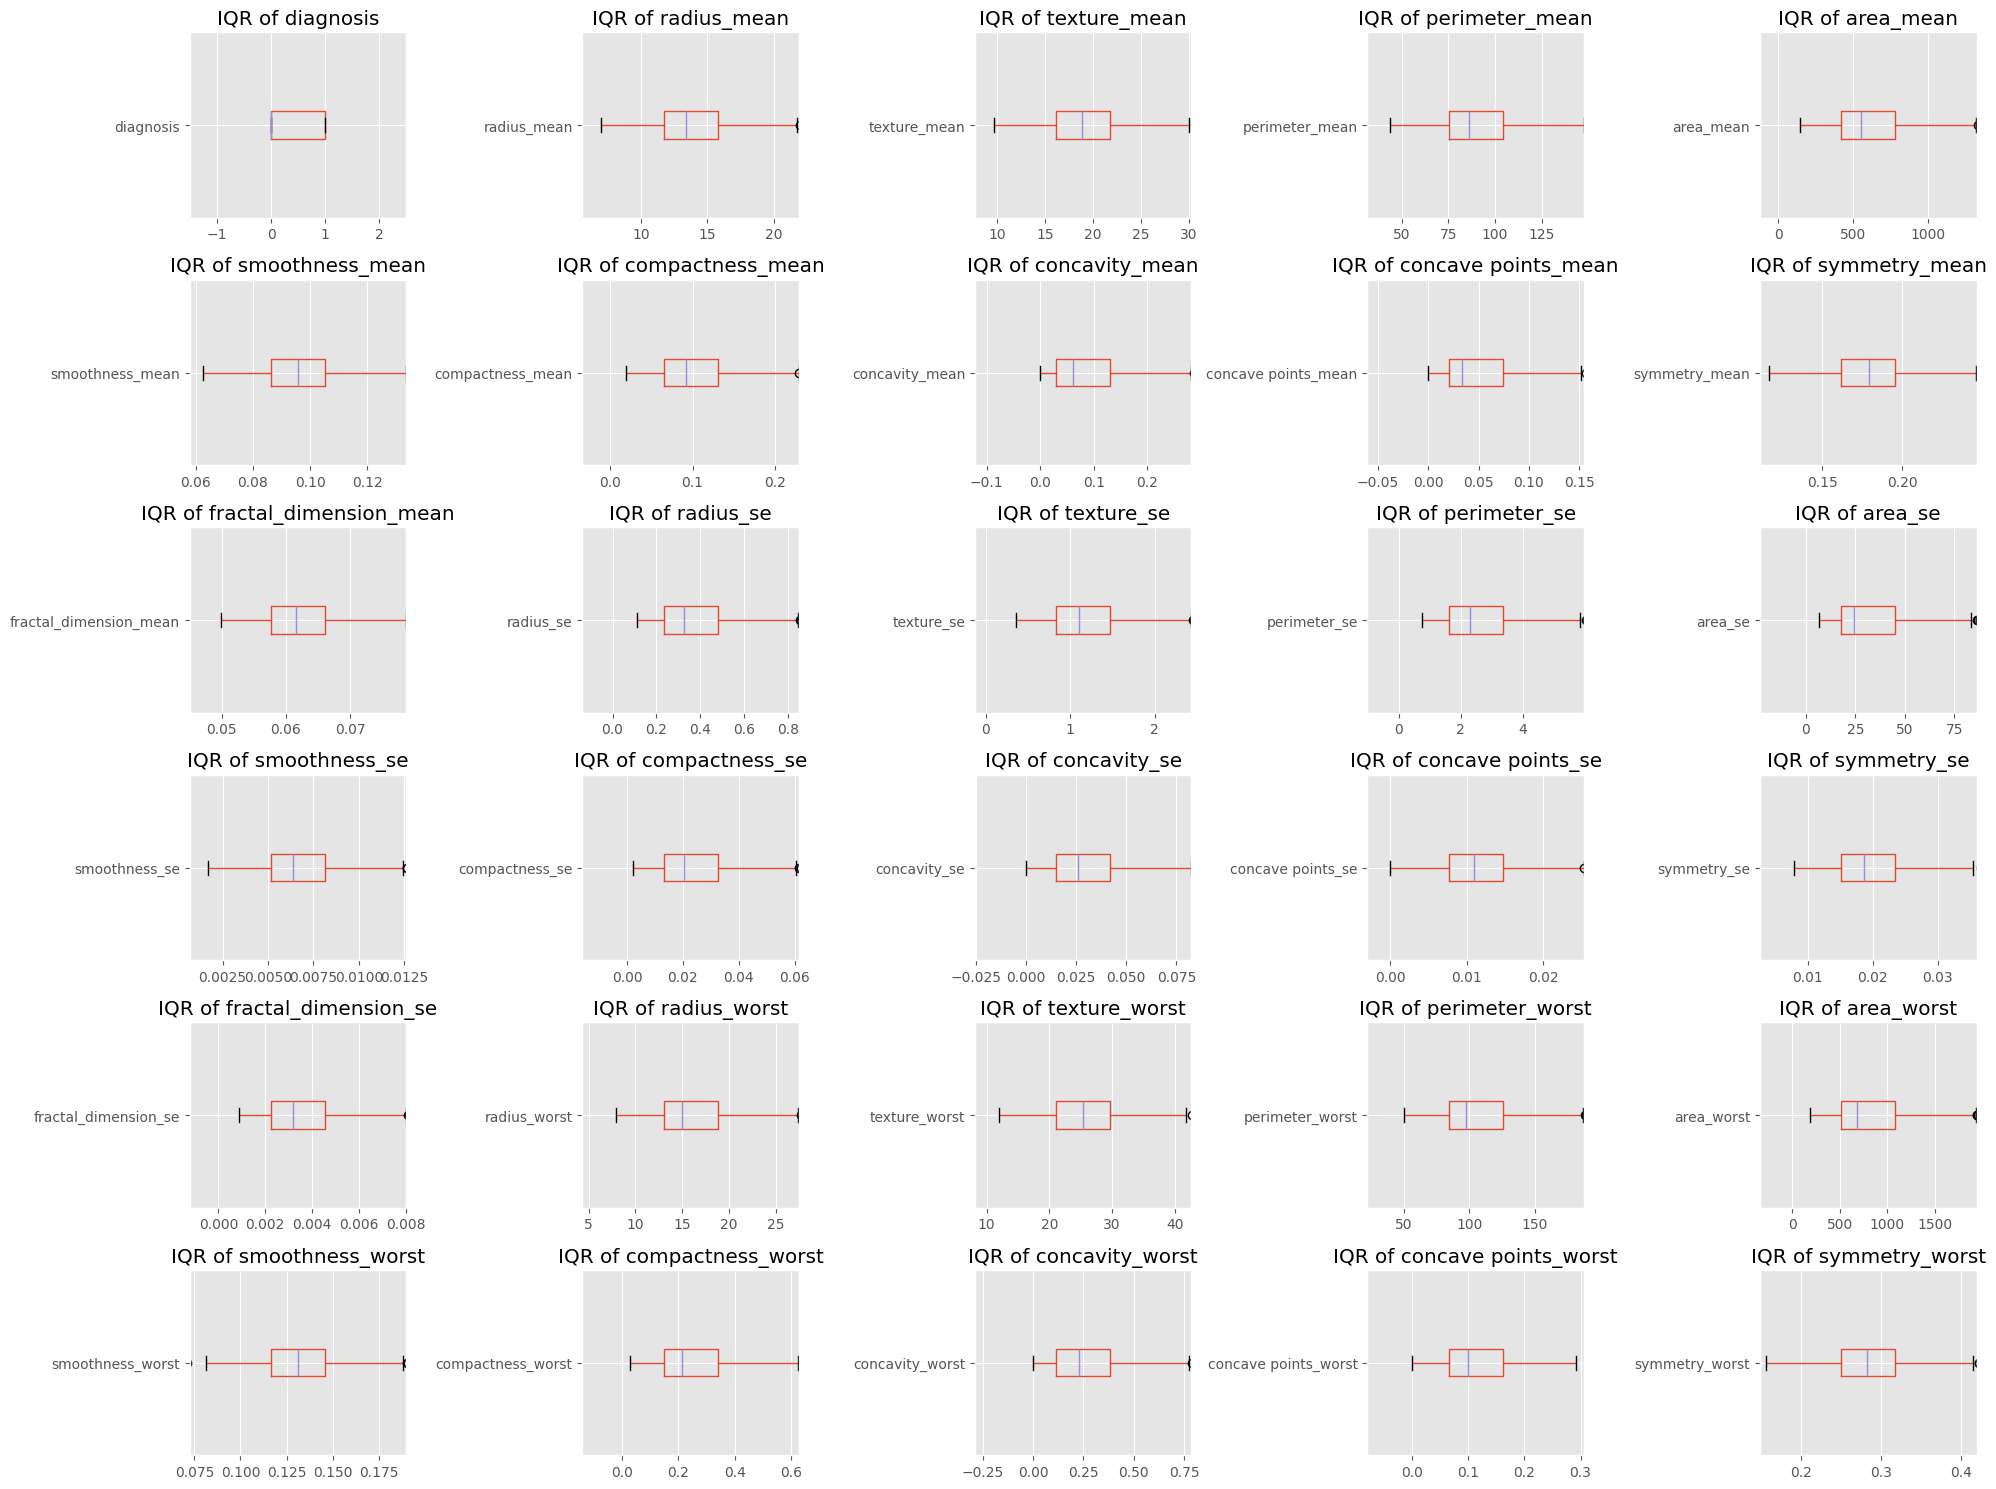

In [40]:
# Calculating the Q1 and Q3 values for each numeric column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculating the IQR value for each numeric column
IQR = Q3 - Q1

# Create a list of all the numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize = (20, 15))
plotnumber = 1

# Plot the IQR for each numeric column
for column in numeric_columns:
    if plotnumber <= 30:
        ax = plt.subplot(6, 5, plotnumber)
        df.boxplot(column=column, vert=False)
        plt.xlim(Q1[column] - 1.5 * IQR[column], Q3[column] + 1.5 * IQR[column])
        plt.title(f"IQR of {column}")
        
    plotnumber += 1

plt.tight_layout()
plt.show()

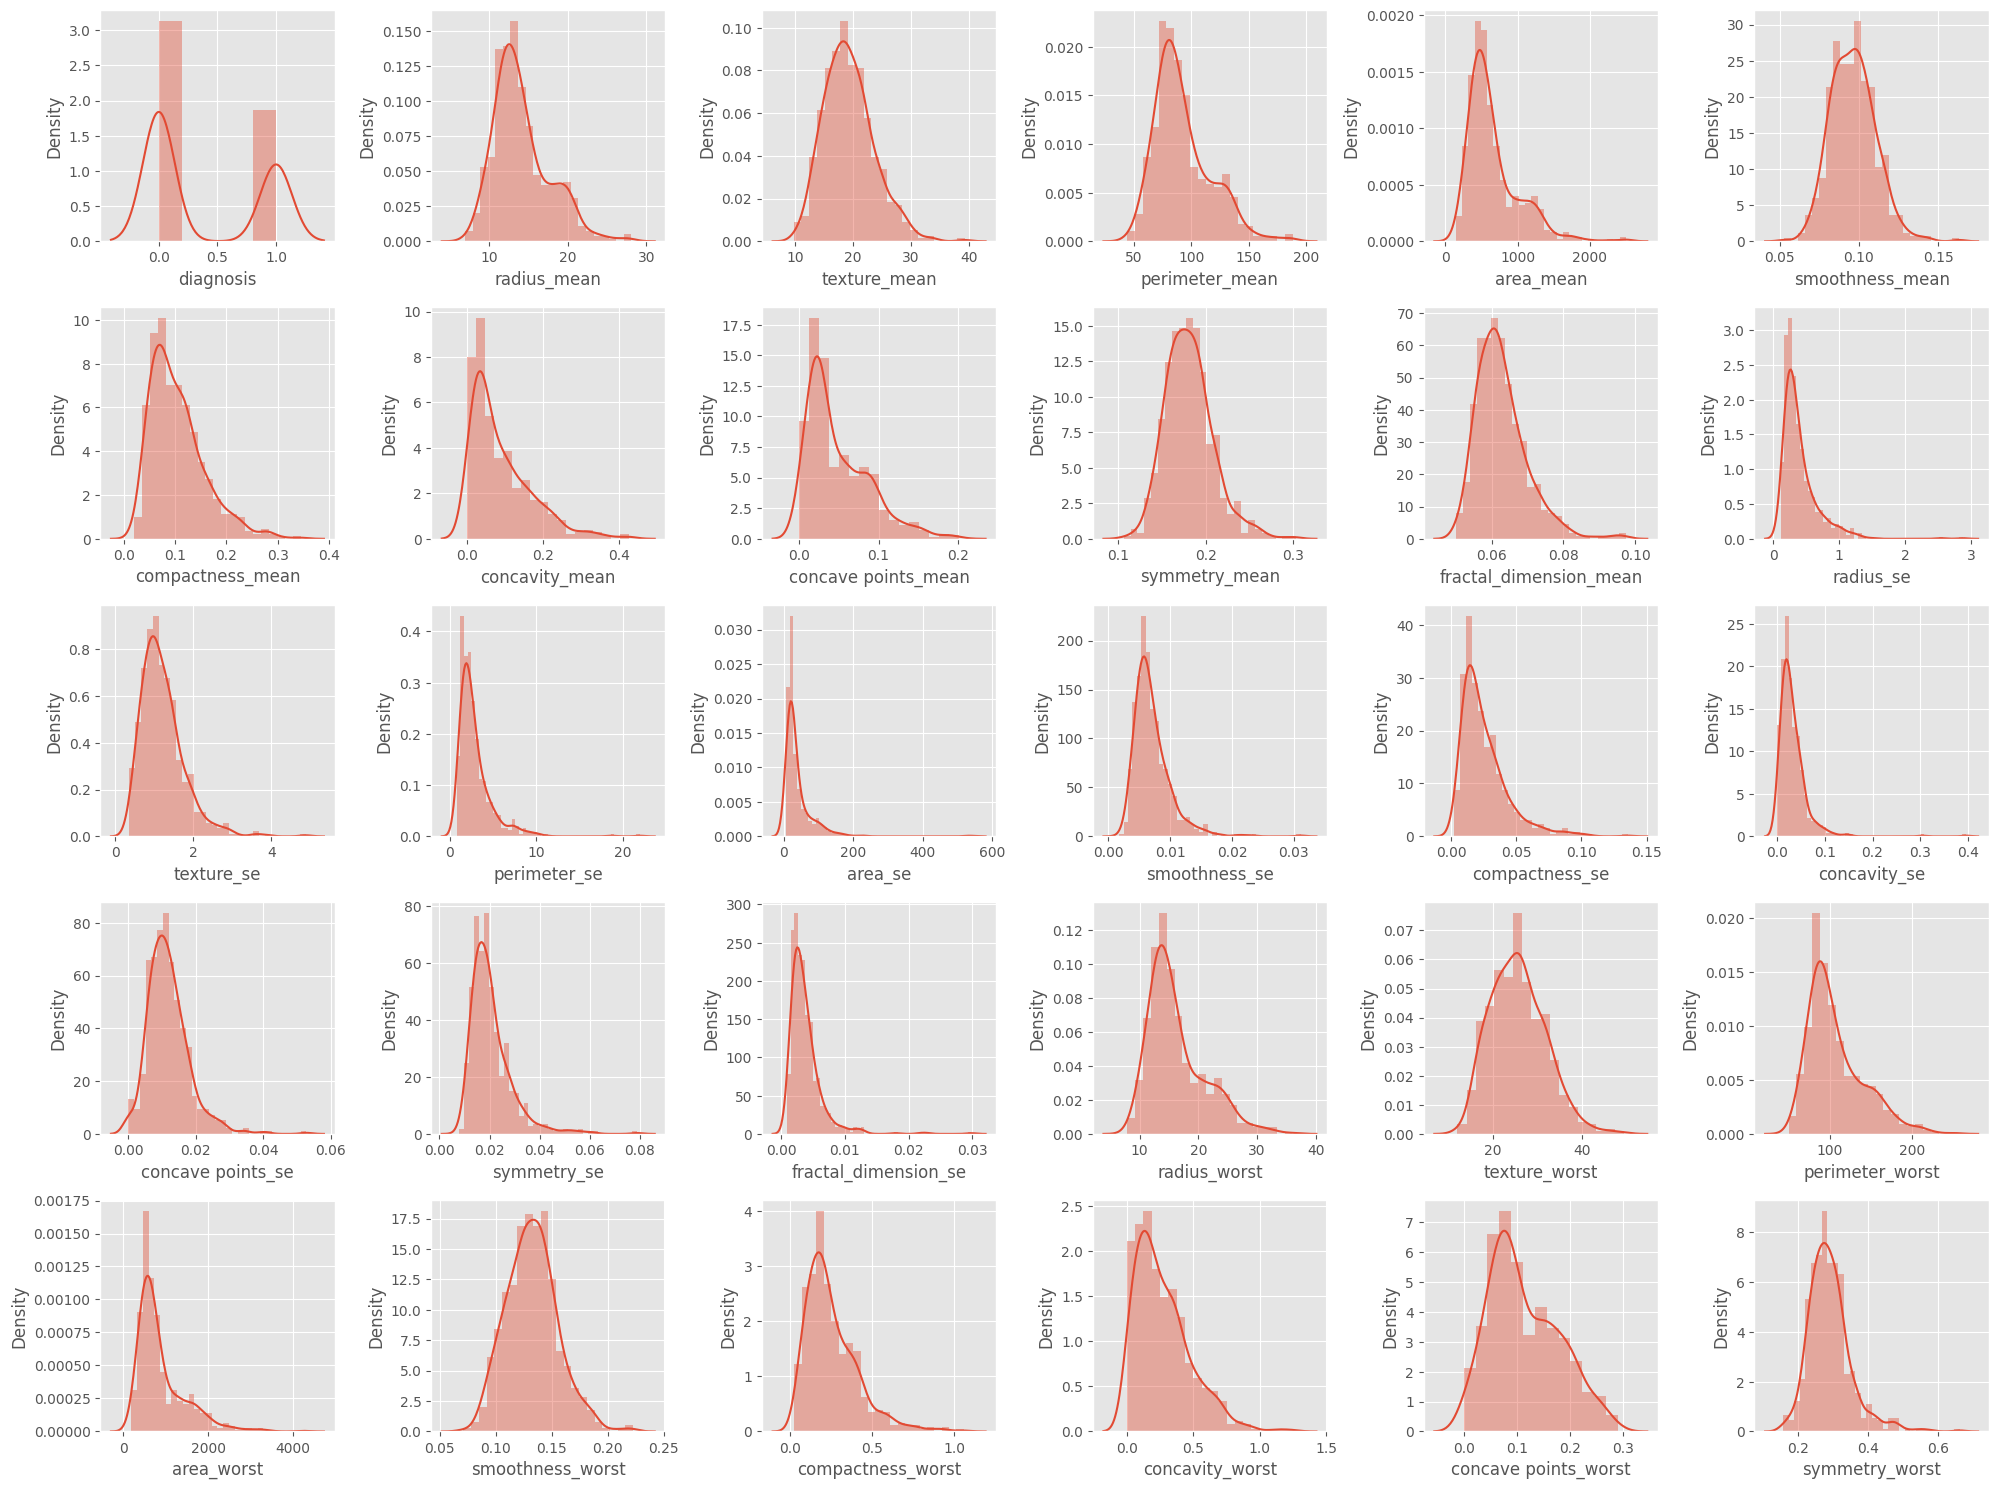

In [41]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

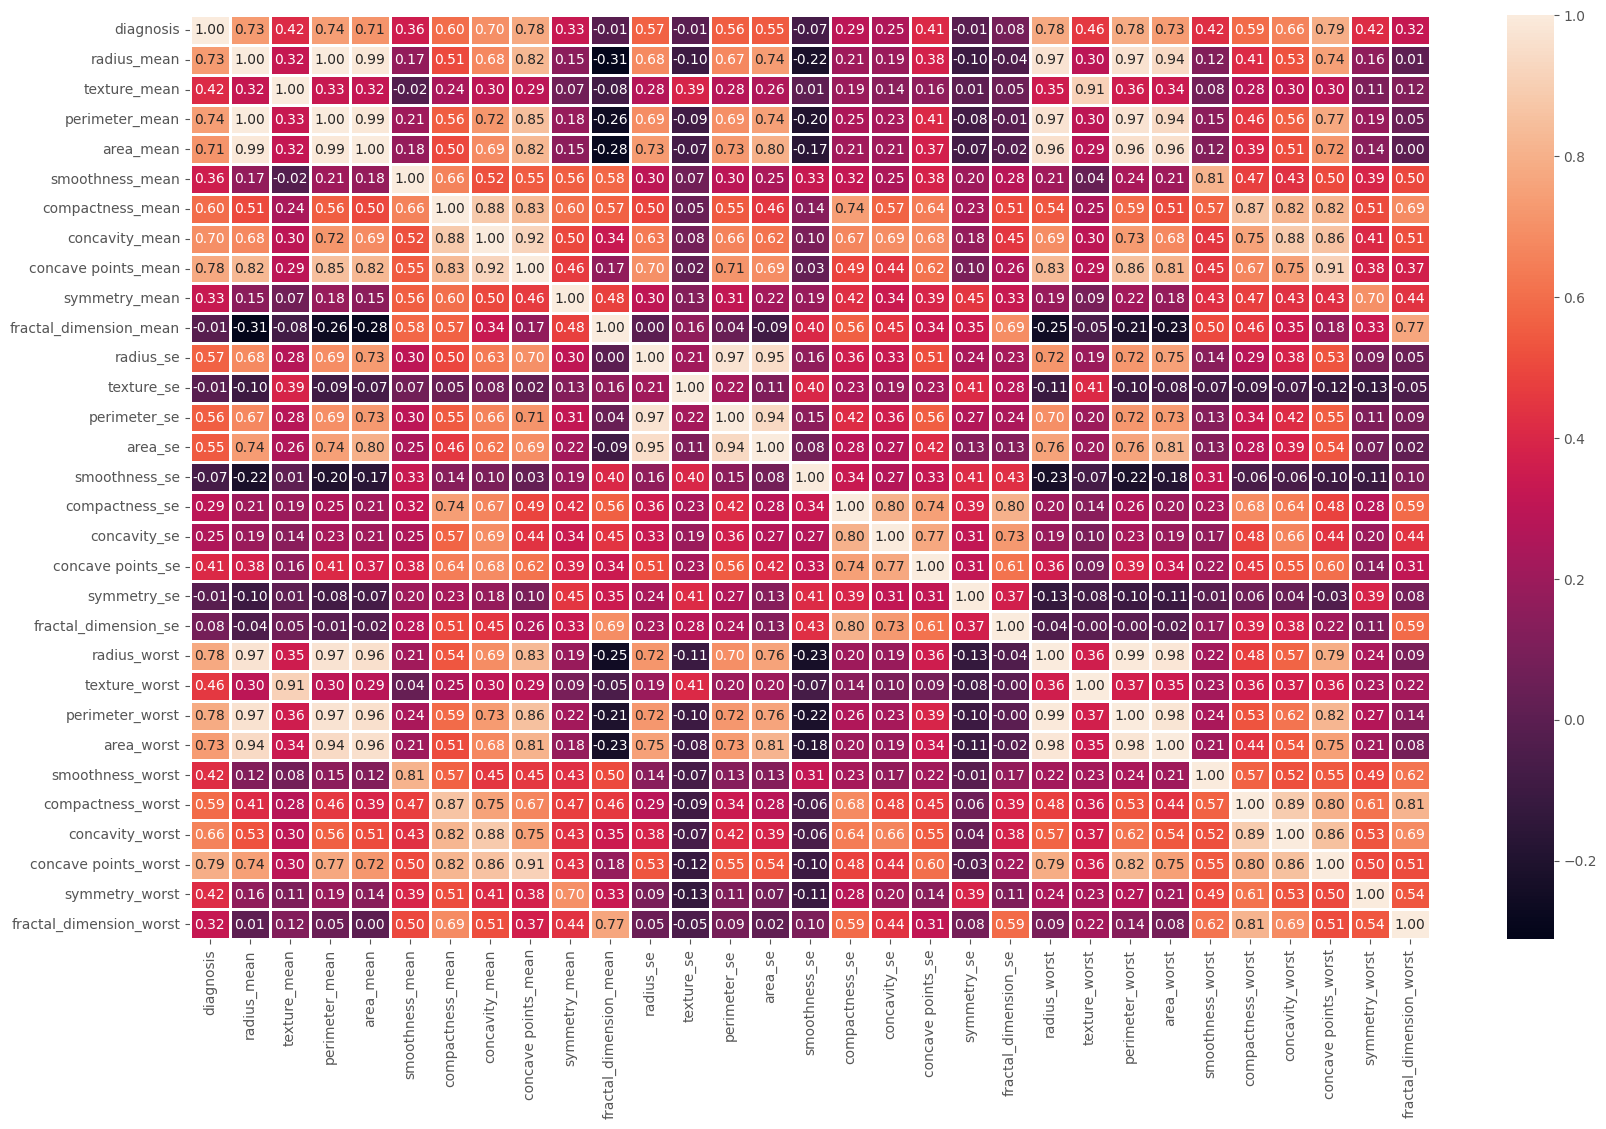

In [42]:
# implementing the correlation heatmap among the numerical columns 

plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

##### We can see that there are many columns which are very highly correlated which causes multicollinearity so we have to remove highly correlated features.

In [43]:
# removing highly correlated features
corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

# selecting features with more than .92 of correlation coefficient
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 23 columns.


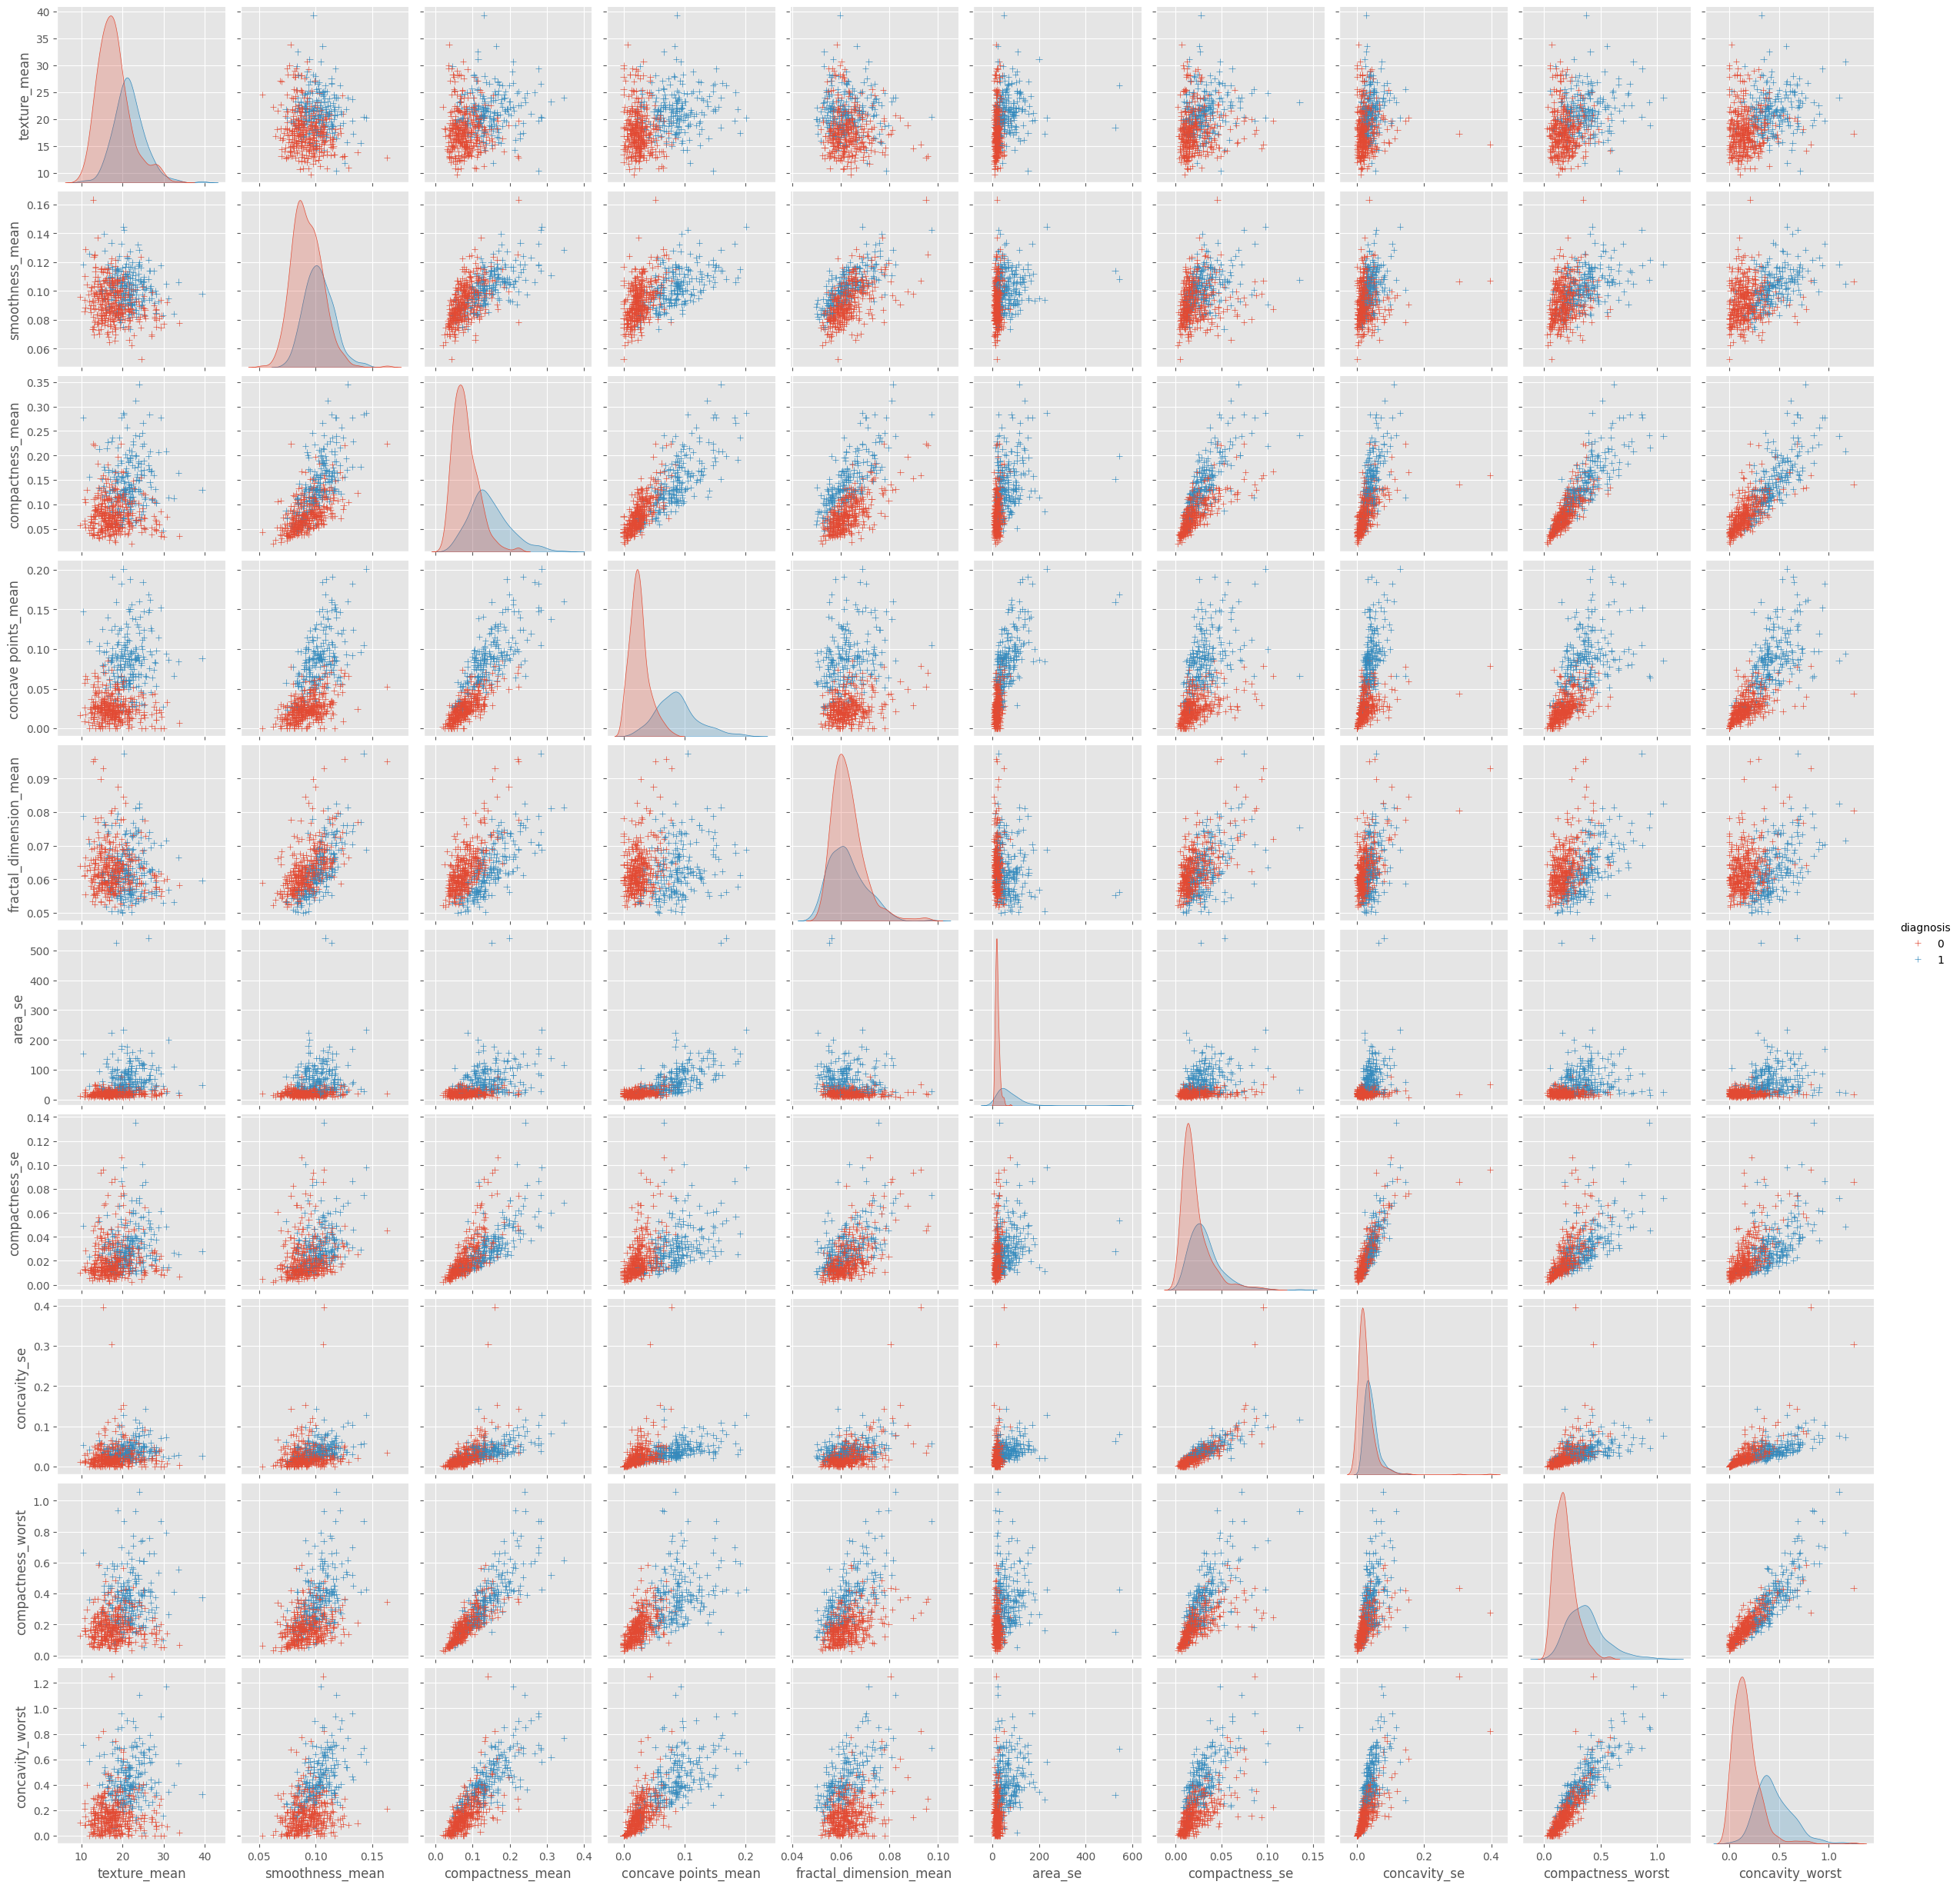

In [44]:
corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_scatter = [x for x in tri_df.columns if any(tri_df[x] > 0.75)]


sns.pairplot(df[to_scatter], diag_kind = "kde", markers = "+",hue = "diagnosis")
plt.show()

## Modeling

In [45]:
# creating features and label 

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [46]:
# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

## Logistic Regression Model

In [47]:
# scaling data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [49]:
# fitting data to model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#  model predictions
y_pred = log_reg.predict(X_test)

In [50]:
# accuracy score
print("The accuracy on training data: ")
print(accuracy_score(y_train, log_reg.predict(X_train)))

print("The accuracy on training data: ")
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

The accuracy on training data: 
0.9899497487437185
The accuracy on training data: 
0.9590643274853801


In [51]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[106   2]
 [  5  58]]


In [52]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## Random Forest Classifier

In [53]:

# Initializing the random forest classifier model
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)



In [54]:
# accuracy score
print("The accuracy score on training data: ")
print(accuracy_score(y_train, rand_clf.predict(X_train)))

print("The accuracy score on testing data: ")
ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

The accuracy score on training data: 
0.9974874371859297
The accuracy score on testing data: 
0.9649122807017544


In [55]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[107   1]
 [  5  58]]


In [56]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



## K-Means clustering

In [58]:
# Initializing the k means clustering mode, we know that the number of clusters will be 2 here
clus=KMeans(n_clusters=2)
clus_fit=clus.fit(X_train, y_train)

test = clus_fit.predict(X_test)

In [61]:
# accuracy score
print("The accuracy score on training data: ")
print(accuracy_score(y_train, clus_fit.predict(X_train)))

print("The accuracy score on testing data: ")
k_means_acc = accuracy_score(y_test, y_pred)
print(k_means_acc)

The accuracy score on training data: 
0.8592964824120602
The accuracy score on testing data: 
0.9649122807017544


In [59]:
print(classification_report(y_pred=test,y_true=y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       108
           1       0.77      0.75      0.76        63

    accuracy                           0.82       171
   macro avg       0.81      0.81      0.81       171
weighted avg       0.82      0.82      0.82       171



In [60]:
print(confusion_matrix(y_pred=test,y_true=y_test))

[[94 14]
 [16 47]]


### Comparison of different classifiers

In [62]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', "K Means Clustering"],
    'Score': [log_reg_acc, ran_clf_acc, k_means_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random Forest Classifier,0.964912
2,K Means Clustering,0.964912
0,Logistic Regression,0.959064
